In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [2]:
wine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)

In [3]:
wine.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [4]:
wine.columns=['winetype','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [5]:
wine.head()

winetype  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0         1    14.23        1.71  2.43               15.6        127   
1         1    13.20        1.78  2.14               11.2        100   
2         1    13.16        2.36  2.67               18.6        101   
3         1    14.37        1.95  2.50               16.8        113   
4         1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
winetype                        178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
wine.describe()

winetype     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [8]:
pd.value_counts(wine['winetype'])

2    71
1    59
3    48
Name: winetype, dtype: int64

In [9]:
x=wine.ix[:,1:14]
y=wine.ix[:,:1]

C:\Users\jason\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [10]:
x.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [11]:
x

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
5      14.20        1.76  2.45               15.2        112           3.27   
6      14.39        1.87  2.45               14.6         96           2.50   
7      14.06        2.15  2.61               17.6        121           2.60   
8      14.83        1.64  2.17               14.0         97           2.80   
9      13.86        1.35  2.27               16.0         98           2.98   
10     14.10        2.16  2.30               18.0        105           2.95   
11     14.12        1.48  2.32               16.8         95           2.20   
12     13.75        1.73  2.41               16.0         89           2.60   
13     14.75        1.73  2.39               11.4         91           3.10   
14     14.38        1.87  2.38               12.0        102           3.30   
15     13.63        1.81  2.70               17.2        112           2.85   
16     14.30        1.92  2.72               20.0        120           2.80   
17     13.83        1.57  2.62               20.0        115           2.95   
18     14.19        1.59  2.48               16.5        108           3.30   
19     13.64        3.10  2.56               15.2        116           2.70   
20     14.06        1.63  2.28               16.0        126           3.00   
21     12.93        3.80  2.65               18.6        102           2.41   
22     13.71        1.86  2.36               16.6        101           2.61   
23     12.85        1.60  2.52               17.8         95           2.48   
24     13.50        1.81  2.61               20.0         96           2.53   
25     13.05        2.05  3.22               25.0        124           2.63   
26     13.39        1.77  2.62               16.1         93           2.85   
27     13.30        1.72  2.14               17.0         94           2.40   
28     13.87        1.90  2.80               19.4        107           2.95   
29     14.02        1.68  2.21               16.0         96           2.65   
..       ...         ...   ...                ...        ...            ...   
148    13.32        3.24  2.38               21.5         92           1.93   
149    13.08        3.90  2.36               21.5        113           1.41   
150    13.50        3.12  2.62               24.0        123           1.40   
151    12.79        2.67  2.48               22.0        112           1.48   
152    13.11        1.90  2.75               25.5        116           2.20   
153    13.23        3.30  2.28               18.5         98           1.80   
154    12.58        1.29  2.10               20.0        103           1.48   
155    13.17        5.19  2.32               22.0         93           1.74   
156    13.84        4.12  2.38               19.5         89           1.80   
157    12.45        3.03  2.64               27.0         97           1.90   
158    14.34        1.68  2.70               25.0         98           2.80   
159    13.48        1.67  2.64               22.5         89           2.60   
160    12.36        3.83  2.38               21.0         88           2.30   
161    13.69        3.26  2.54               20.0        107           1.83   
162    12.85        3.27  2.58               22.0        106           1.65   
163    12.96        3.45  2.35               18.5        106           1.39   
164    13.78        2.76  2.30               22.0         90           1.35   
165    13.73        4.36  2.26               22.5         88           1.28   
166    13.45        3.70  2.60               23.0      

In [12]:
y.columns

Index(['winetype'], dtype='object')

In [17]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)
model.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [18]:
pd.value_counts(model.labels_)

2    69
0    62
1    47
dtype: int64

In [19]:
pd.value_counts(y['winetype'])

2    71
1    59
3    48
Name: winetype, dtype: int64

In [20]:
# We convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [3, 1, 2]).astype(np.int64)

In [21]:
pd.value_counts(y['winetype'])

2    71
1    59
3    48
Name: winetype, dtype: int64

In [22]:
pd.value_counts(model.labels_)

2    69
0    62
1    47
dtype: int64

In [23]:
pd.value_counts(predY)

2    69
3    62
1    47
dtype: int64

In [24]:
# Performance Metrics
sm.accuracy_score(y, predY)

0.702247191011236

In [25]:
sm.confusion_matrix(y, predY)

array([[46,  0, 13],
       [ 1, 50, 20],
       [ 0, 19, 29]], dtype=int64)

In [26]:
from ggplot import *
%matplotlib inline

C:\Users\jason\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\jason\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\jason\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


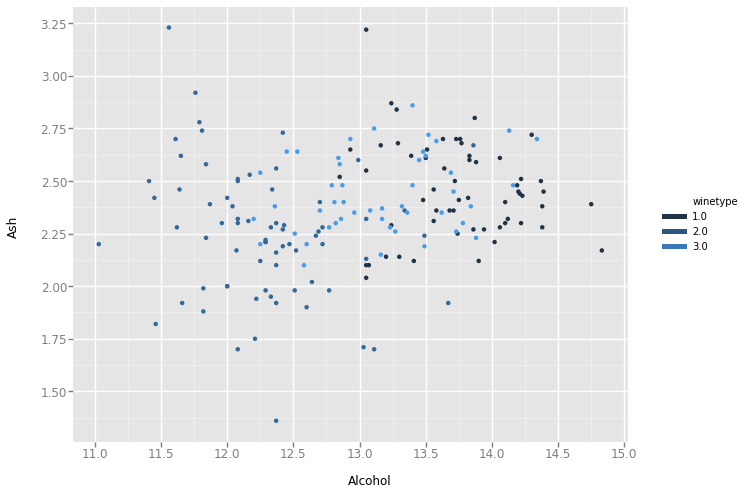

<ggplot: (179612431659)>

In [27]:
p = ggplot(aes(x='Alcohol', y='Ash',color="winetype"), data=wine)
p + geom_point()